In [1]:
pip install MFDFA

Note: you may need to restart the kernel to use updated packages.


In [2]:
from MFDFA import MFDFA
import pyedflib
import glob as gl
import matplotlib.image as mpimg


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import mne


In [3]:
def filtroFIR(sig,fp):
    sfreq = 256
    f_p = fp
    transition_band = 0.25 * f_p
    f_s = f_p + transition_band


    h = mne.filter.create_filter(sig, sfreq, l_freq=None, h_freq=f_p,
                                 fir_design='firwin2', verbose=True)
    sig_filtrada = np.convolve(h, sig)[len(h) // 2:]
    
    return sig_filtrada


def derivar(sig):
    sigbufsdif = np.zeros(17,(len(sig[1])-1))
    for canal in range(17):    
        for i in range(len(sig[canal])-1):
            sigbufsdif[canal,i]=(sig[canal][i + 1] - sig[canal][i])


In [4]:
# %%
# %%
# %%
import mne

sample_dir = r"D:\Usuario\OneDrive\Escritorio\Uni\Pasantia\PacienteCon10.EDF"


f = pyedflib.EdfReader(sample_dir )
n = f.signals_in_file

signal_labels = f.getSignalLabels()
sigbufs = np.zeros((17, f.getNSamples()[0]))
sigbufs[0, :] = (f.readSignal(0)-f.readSignal(1)) #Fp1-F3
sigbufs[1, :] = (f.readSignal(1)-f.readSignal(2)) #F3-C3
sigbufs[2, :] =(f.readSignal(2)-f.readSignal(3)) #C3-P3
sigbufs[3, :] =(f.readSignal(3)-f.readSignal(4)) #P3-O1
sigbufs[4, :] =(f.readSignal(0)-f.readSignal(5)) #Fp1-F7
sigbufs[5, :] =(f.readSignal(5)-f.readSignal(6)) #F7-T3
sigbufs[6, :] =(f.readSignal(6)-f.readSignal(7)) #T3-T5
sigbufs[7, :] =(f.readSignal(7)-f.readSignal(4)) #T5-O1
sigbufs[8, :] =(f.readSignal(19)) #Cz-Ref
sigbufs[9, :] =(f.readSignal(9)-f.readSignal(10)) #Fp2-F4
sigbufs[10, :] =(f.readSignal(10)-f.readSignal(11)) #F4-C4
sigbufs[11, :] =(f.readSignal(11)-f.readSignal(12)) #C4-P4
sigbufs[12, :] =(f.readSignal(12)-f.readSignal(13)) #P4-O2
sigbufs[13, :] =(f.readSignal(9)-f.readSignal(14)) #Fp2-F8
sigbufs[14, :] =(f.readSignal(14)-f.readSignal(15)) #F8-T4
sigbufs[15, :] =(f.readSignal(15)-f.readSignal(16)) #T4-T6
sigbufs[16, :] =(f.readSignal(16)-f.readSignal(4)) #T6-O1



In [5]:
sig1 = []
sig2 = []
fpL =30
ventana = 100

timeI1 = 764 
timeF1 = timeI1 + ventana
timeI2 = 180 
timeF2 = timeI2 + ventana

inicio = int(timeI1*256)
final = int(timeF1*256)
inicio2 = int(timeI2*256)
final2 = int(timeF2*256)
for i in range(0,17):
    
    sig1.append(filtroFIR(sigbufs[i][inicio:final],fpL))
    sig2.append(filtroFIR(sigbufs[i][inicio2:final2],fpL))
    
sig1 =np.array(sig1)
sig2 =np.array(sig2)


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6

In [65]:
import numpy as np

sfreq = 256  # Frecuencia de muestreo


ch_names = ['Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 
            'Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1','Cz-Ref' ,'Fp2-F4', 
            'F4-C4', 'C4-P4', 'P4-O2', 'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O1']

info = mne.create_info(ch_names=ch_names, sfreq=sfreq)

raw = mne.io.RawArray(sigbufs[0:17][:], info)

scalings = {'mag': 2, 'grad': 2}

raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)



Creating RawArray with float64 data, n_channels=17, n_times=348160
    Range : 0 ... 348159 =      0.000 ...  1359.996 secs
Ready.
Channels marked as bad:
none


In [64]:



ch_names = ['Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 
            'Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1','Cz-Ref' ,'Fp2-F4', 
            'F4-C4', 'C4-P4', 'P4-O2', 'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O1']

info = mne.create_info(ch_names=ch_names, sfreq=sfreq)

raw = mne.io.RawArray(sig2[0:17][:], info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
scalings = {'mag': 2, 'grad': 2}


raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)

ValueError: Data must be a 2D array of shape (n_channels, n_samples), got shape (0,)

In [8]:
lag = np.unique(np.logspace(6, 10, 10, base = 2).astype(int))
start = -20
stop = 20
num = abs(start) + stop + 1
qo = np.linspace(start,stop,num)
q = []
for dato in qo:
    if dato != 0:
        q.append(dato)

order = 1


Hs = []

In [9]:
canal = 0


H = np.zeros(17)
for canal in range(17):    
    
    DAT = sig2[canal] 
    lag, dfa = MFDFA(np.asarray(DAT), lag = lag, q = 2, order = order)
    Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]
    H[canal] = Ho


In [10]:
H

array([0.79623595, 0.67870294, 0.76390888, 0.53688339, 0.83264703,
       0.88894875, 0.93799873, 0.42550183, 0.48724898, 1.27250473,
       0.5130489 , 0.58922778, 0.44690579, 1.30298848, 0.7561537 ,
       0.60159469, 0.37338936])

In [11]:
ventana = 50

sig2 = []
HvC = []
fpL =30

for j in range(int(len(sigbufs[0])/(256*ventana))):
    sig1 = []
    for i in range(0,17):
        timeI1 = ventana*j
        timeF1 = timeI1 + ventana

        inicio = int(timeI1*256)
        final = int(timeF1*256)
            
        sig1.append(filtroFIR(sigbufs[i][inicio:final],fpL))
        H = np.zeros(17)
    
    for canal in range(17):    
        
        DAT = sig1[canal] 
        lag, dfa = MFDFA(np.asarray(DAT), lag = lag, q = 2, order = order)
        Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]
        H[canal] = Ho
    HvC.append(H)    
        


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6

Text(0, 0.5, 'H(2)')

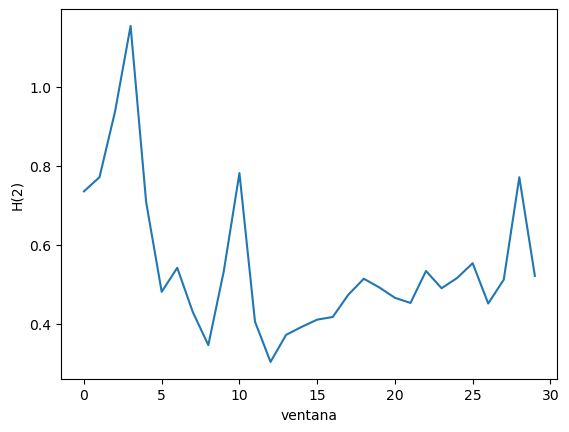

In [14]:
ploteo = []
canal = 1

for i in range(len(HvC)):

    ploteo.append(HvC[i][canal])
plt.plot(ploteo)
plt.xlabel("ventana")
plt.ylabel("H(2)")    

In [55]:
sample_dir = r"D:\Usuario\OneDrive\Escritorio\Uni\Pasantia\PacienteSin1.EDF"


f = pyedflib.EdfReader(sample_dir )
n = f.signals_in_file

signal_labels = f.getSignalLabels()
sigbufs = np.zeros((17, f.getNSamples()[0]))
sigbufs[0, :] = (f.readSignal(0)-f.readSignal(1)) #Fp1-F3
sigbufs[1, :] = (f.readSignal(1)-f.readSignal(2)) #F3-C3
sigbufs[2, :] =(f.readSignal(2)-f.readSignal(3)) #C3-P3
sigbufs[3, :] =(f.readSignal(3)-f.readSignal(4)) #P3-O1
sigbufs[4, :] =(f.readSignal(0)-f.readSignal(5)) #Fp1-F7
sigbufs[5, :] =(f.readSignal(5)-f.readSignal(6)) #F7-T3
sigbufs[6, :] =(f.readSignal(6)-f.readSignal(7)) #T3-T5
sigbufs[7, :] =(f.readSignal(7)-f.readSignal(4)) #T5-O1
sigbufs[8, :] =(f.readSignal(19)) #Cz-Ref
sigbufs[9, :] =(f.readSignal(9)-f.readSignal(10)) #Fp2-F4
sigbufs[10, :] =(f.readSignal(10)-f.readSignal(11)) #F4-C4
sigbufs[11, :] =(f.readSignal(11)-f.readSignal(12)) #C4-P4
sigbufs[12, :] =(f.readSignal(12)-f.readSignal(13)) #P4-O2
sigbufs[13, :] =(f.readSignal(9)-f.readSignal(14)) #Fp2-F8
sigbufs[14, :] =(f.readSignal(14)-f.readSignal(15)) #F8-T4
sigbufs[15, :] =(f.readSignal(15)-f.readSignal(16)) #T4-T6
sigbufs[16, :] =(f.readSignal(16)-f.readSignal(4)) #T6-O1

ventana = 50

sig2 = []
Hv = []
fpL =30

for j in range(int(len(sigbufs[0])/(256*ventana))):
    sig1 = []
    for i in range(0,17):
        timeI1 = ventana*j
        timeF1 = timeI1 + ventana

        inicio = int(timeI1*256)
        final = int(timeF1*256)
        
            
        sig1.append(filtroFIR(sigbufs[i][inicio:final],fpL))
        H = np.zeros(17)
    
    for canal in range(17):    
        
        DAT = sig1[canal] 
        lag, dfa = MFDFA(np.asarray(DAT), lag = lag, q = 2, order = order)
        Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]
        H[canal] = Ho
    Hv.append(H)  



Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6

Text(0, 0.5, 'H(2)')

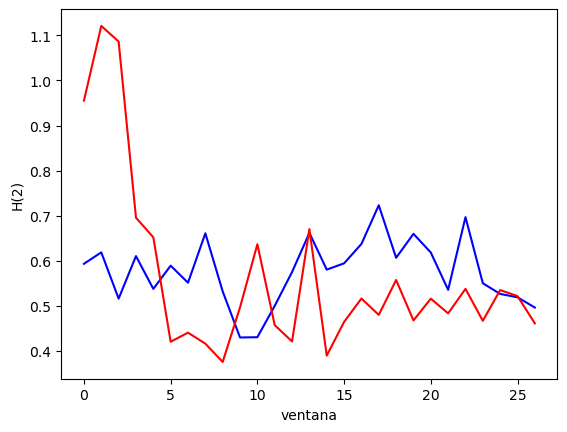

In [68]:
ploteoC = []
ploteoS = []
canal = 15


for i in range(len(Hv)):
    ploteoC.append(HvC[i][canal])
    ploteoS.append(Hv[i][canal])
plt.plot(ploteoS,'b')
plt.plot(ploteoC,'r')

plt.xlabel("ventana")
plt.ylabel("H(2)") 

In [43]:
len(Hv)

48